In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#text classification 

In [3]:
#spam .csv= This is dataset of mobile sms,we have all the messages over here and for each #messages, a category has been
# given so a message either a spam or a not spam

In [4]:
df = pd.read_csv("spam.csv", encoding='latin1')
df

,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,not spam,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,not spam,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,not spam,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.isnull().sum()/df.shape[0]*100

category       0.000000
message        0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [6]:
#to delete unwanted column
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df


,category,message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,not spam,Will Ì_ b going to esplanade fr home?
5569,not spam,"Pity, * was in mood for that. So...any other s..."
5570,not spam,The guy did some bitching but I acted like i'd...


In [8]:
#now use first wordCloud
#call wordcloud; inbuilt class
from wordcloud import WordCloud,STOPWORDS

In [9]:
# Create an object of the WordCloud class
my_cloud = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)

In [10]:
my_cloud.generate(''.join(df[df['category']=='spam']['message']))

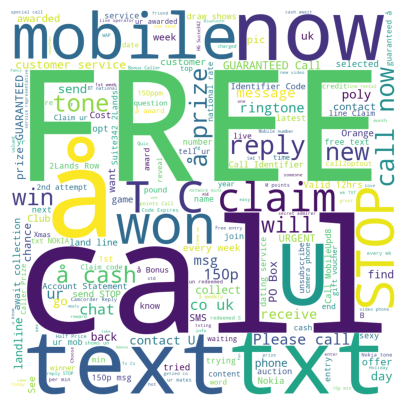

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

In [12]:
# Create an object of the WordCloud class
my_cloud_notspam = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)
my_cloud_notspam.generate(''.join(df[df['category']=='not spam']['message']))


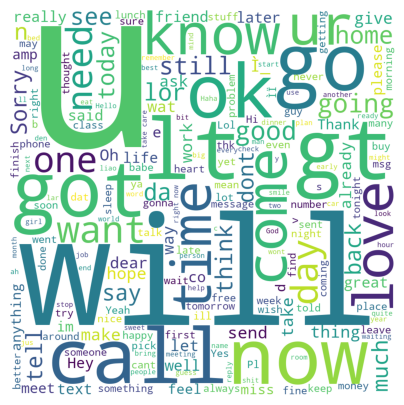

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud_notspam)
plt.axis('off')
plt.show()

In [14]:
#text preprocessing:-
#remove stopwords
#list of stopwords
stop=stopwords.words('english') #user define object

In [15]:
#user define function for preprocessing of text
def clean_text(text):           #here clean_text() is a user define passing argument function
    #converting lower case  and then tokenize it
    token=word_tokenize(text.lower())
    #filter only the alphabet use inbuilt functions isalpha() #remove number and special character from text
    word_token=[t for t in token if t.isalpha()] #word token user define list object
    #remove stopwords
    #use list comphrension
    print(token)
    print(word_token)
    clean_tokens=[t for t in word_token if t not in stop] 
    
    print(clean_tokens)
    #next step of preprocessing :Lemmanitzation
    
    #create object of WordnetLemmanitzater class
    lemma=WordNetLemmatizer()
    lemmatized_token=[lemma.lemmatize(t) for t in clean_tokens]
    return " ".join(lemmatized_token)

In [16]:
clean_text("Meena I am 123 wolves wolf wolfies studied study studies study to the if a or not Pandey@gmail.com")

['meena', 'i', 'am', '123', 'wolves', 'wolf', 'wolfies', 'studied', 'study', 'studies', 'study', 'to', 'the', 'if', 'a', 'or', 'not', 'pandey', '@', 'gmail.com']
['meena', 'i', 'am', 'wolves', 'wolf', 'wolfies', 'studied', 'study', 'studies', 'study', 'to', 'the', 'if', 'a', 'or', 'not', 'pandey']
['meena', 'wolves', 'wolf', 'wolfies', 'studied', 'study', 'studies', 'study', 'pandey']


'meena wolf wolf wolfies studied study study study pandey'

In [17]:
#we apply the same clean_text() on the entire column of Message of dataset
df['message']=df['message'].apply(clean_text) #passing the function in apply() inbuilt function
#df[message] is a parameter

['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810075over18', "'s"]
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'may', 'tex

['pain', 'urination', 'thing', 'else']
['7', 'at', 'esplanade', '..', 'do', 'ì_', 'mind', 'giving', 'me', 'a', 'lift', 'cos', 'i', 'got', 'no', 'car', 'today', '..']
['at', 'esplanade', 'do', 'mind', 'giving', 'me', 'a', 'lift', 'cos', 'i', 'got', 'no', 'car', 'today']
['esplanade', 'mind', 'giving', 'lift', 'cos', 'got', 'car', 'today']
['i', 'wnt', 'to', 'buy', 'a', 'bmw', 'car', 'urgently', '..', 'its', 'vry', 'urgent.but', 'hv', 'a', 'shortage', 'of', '&', 'lt', ';', '#', '&', 'gt', ';', 'lacs.there', 'is', 'no', 'source', 'to', 'arng', 'dis', 'amt', '.', '&', 'lt', ';', '#', '&', 'gt', ';', 'lacs', '..', 'thats', 'my', 'prob']
['i', 'wnt', 'to', 'buy', 'a', 'bmw', 'car', 'urgently', 'its', 'vry', 'hv', 'a', 'shortage', 'of', 'lt', 'gt', 'is', 'no', 'source', 'to', 'arng', 'dis', 'amt', 'lt', 'gt', 'lacs', 'thats', 'my', 'prob']
['wnt', 'buy', 'bmw', 'car', 'urgently', 'vry', 'hv', 'shortage', 'lt', 'gt', 'source', 'arng', 'dis', 'amt', 'lt', 'gt', 'lacs', 'thats', 'prob']
['at', '

['january', 'male', 'sale', '!', 'hot', 'gay', 'chat', 'now', 'cheaper', ',', 'call', '08709222922.', 'national', 'rate', 'from', '1.5p/min', 'cheap', 'to', '7.8p/min', 'peak', '!', 'to', 'stop', 'texts', 'call', '08712460324', '(', '10p/min', ')']
['january', 'male', 'sale', 'hot', 'gay', 'chat', 'now', 'cheaper', 'call', 'national', 'rate', 'from', 'cheap', 'to', 'peak', 'to', 'stop', 'texts', 'call']
['january', 'male', 'sale', 'hot', 'gay', 'chat', 'cheaper', 'call', 'national', 'rate', 'cheap', 'peak', 'stop', 'texts', 'call']
['my', 'love', '!', 'how', 'come', 'it', 'took', 'you', 'so', 'long', 'to', 'leave', 'for', 'zaher', "'s", '?', 'i', 'got', 'your', 'words', 'on', 'ym', 'and', 'was', 'happy', 'to', 'see', 'them', 'but', 'was', 'sad', 'you', 'had', 'left', '.', 'i', 'miss', 'you']
['my', 'love', 'how', 'come', 'it', 'took', 'you', 'so', 'long', 'to', 'leave', 'for', 'zaher', 'i', 'got', 'your', 'words', 'on', 'ym', 'and', 'was', 'happy', 'to', 'see', 'them', 'but', 'was', 's

['free2day', 'sexy', 'st', 'george', "'s", 'day', 'pic', 'of', 'jordan', '!', 'txt', 'pic', 'to', '89080', 'dont', 'miss', 'out', ',', 'then', 'every', 'wk', 'a', 'saucy', 'celeb', '!', '4', 'more', 'pics', 'c', 'pocketbabe.co.uk', '0870241182716', 'å£3/wk']
['sexy', 'st', 'george', 'day', 'pic', 'of', 'jordan', 'txt', 'pic', 'to', 'dont', 'miss', 'out', 'then', 'every', 'wk', 'a', 'saucy', 'celeb', 'more', 'pics', 'c']
['sexy', 'st', 'george', 'day', 'pic', 'jordan', 'txt', 'pic', 'dont', 'miss', 'every', 'wk', 'saucy', 'celeb', 'pics', 'c']
['bugis', 'oso', 'near', 'wat', '...']
['bugis', 'oso', 'near', 'wat']
['bugis', 'oso', 'near', 'wat']
['yo', 'theres', 'no', 'class', 'tmrw', 'right', '?']
['yo', 'theres', 'no', 'class', 'tmrw', 'right']
['yo', 'theres', 'class', 'tmrw', 'right']
['let', 'ur', 'heart', 'be', 'ur', 'compass', 'ur', 'mind', 'ur', 'map', 'ur', 'soul', 'ur', 'guide', 'and', 'u', 'will', 'never', 'loose', 'in', 'world', '....', 'gnun', '-', 'sent', 'via', 'way2sms.co

['are', 'you', 'going', 'to', 'write', 'ccna', 'exam', 'this', 'week', '?', '?']
['are', 'you', 'going', 'to', 'write', 'ccna', 'exam', 'this', 'week']
['going', 'write', 'ccna', 'exam', 'week']
['well', 'i', 'will', 'watch', 'shrek', 'in', '3d', '!', '!', 'b', ')']
['well', 'i', 'will', 'watch', 'shrek', 'in', 'b']
['well', 'watch', 'shrek', 'b']
['am', 'i', 'that', 'much', 'dirty', 'fellow', '?']
['am', 'i', 'that', 'much', 'dirty', 'fellow']
['much', 'dirty', 'fellow']
['dunno', 'dat', "'s", 'wat', 'he', 'told', 'me', '.', 'ok', 'lor', '...']
['dunno', 'dat', 'wat', 'he', 'told', 'me', 'ok', 'lor']
['dunno', 'dat', 'wat', 'told', 'ok', 'lor']
['i', "'ll", 'probably', 'be', 'by', 'tomorrow', '(', 'or', 'even', 'later', 'tonight', 'if', 'something', "'s", 'going', 'on', ')']
['i', 'probably', 'be', 'by', 'tomorrow', 'or', 'even', 'later', 'tonight', 'if', 'something', 'going', 'on']
['probably', 'tomorrow', 'even', 'later', 'tonight', 'something', 'going']
['i', 'could', "n't", 'say',

['hmm', '...', 'bad', 'news', '...', 'hype', 'park', 'plaza', '$', '700', 'studio', 'taken', '...', 'only', 'left', '2', 'bedrm-', '$', '900', '...']
['hmm', 'bad', 'news', 'hype', 'park', 'plaza', 'studio', 'taken', 'only', 'left']
['hmm', 'bad', 'news', 'hype', 'park', 'plaza', 'studio', 'taken', 'left']
['sorry', ',', 'i', "'ll", 'call', 'later', 'in', 'meeting']
['sorry', 'i', 'call', 'later', 'in', 'meeting']
['sorry', 'call', 'later', 'meeting']
['r', 'ì_', 'comin', 'back', 'for', 'dinner', '?']
['r', 'comin', 'back', 'for', 'dinner']
['r', 'comin', 'back', 'dinner']
['i', 'hav', 'almost', 'reached', '.', 'call', ',', 'i', 'm', 'unable', 'to', 'connect', 'u', '.']
['i', 'hav', 'almost', 'reached', 'call', 'i', 'm', 'unable', 'to', 'connect', 'u']
['hav', 'almost', 'reached', 'call', 'unable', 'connect', 'u']
['whom', 'you', 'waited', 'for', 'yesterday']
['whom', 'you', 'waited', 'for', 'yesterday']
['waited', 'yesterday']
['i', 'reach', 'home', 'safe', 'n', 'sound', 'liao', '...'

['hope', 'you', 'enjoyed', 'your', 'new', 'content', '.', 'text', 'stop', 'to', '61610', 'to', 'unsubscribe', '.', 'help:08712400602450p', 'provided', 'by', 'tones2you.co.uk']
['hope', 'you', 'enjoyed', 'your', 'new', 'content', 'text', 'stop', 'to', 'to', 'unsubscribe', 'provided', 'by']
['hope', 'enjoyed', 'new', 'content', 'text', 'stop', 'unsubscribe', 'provided']
['wen', 'ur', 'lovable', 'bcums', 'angry', 'wid', 'u', ',', 'dnt', 'take', 'it', 'seriously', '..', 'coz', 'being', 'angry', 'is', 'd', 'most', 'childish', 'n', 'true', 'way', 'of', 'showing', 'deep', 'affection', ',', 'care', 'n', 'luv', '!', '..', 'kettoda', 'manda', '...', 'have', 'nice', 'day', 'da', '.']
['wen', 'ur', 'lovable', 'bcums', 'angry', 'wid', 'u', 'dnt', 'take', 'it', 'seriously', 'coz', 'being', 'angry', 'is', 'd', 'most', 'childish', 'n', 'true', 'way', 'of', 'showing', 'deep', 'affection', 'care', 'n', 'luv', 'kettoda', 'manda', 'have', 'nice', 'day', 'da']
['wen', 'ur', 'lovable', 'bcums', 'angry', 'wi

['dear', 'voucher', 'holder', 'claim', 'weeks', 'offer', 'pc', 'please', 'go', 'http', 'ts', 'cs', 'apply']
['it', 'vl', 'bcum', 'more', 'difficult', '..']
['it', 'vl', 'bcum', 'more', 'difficult']
['vl', 'bcum', 'difficult']
['ur', 'going', '2', 'banot', 'spamas', '!', 'callfreefone', '08081560665', 'and', 'speak', 'to', 'a', 'live', 'operator', 'to', 'claim', 'either', 'banot', 'spamas', 'cruise', 'ofå£2000', 'cash', '18+only', '.', 'to', 'opt', 'out', 'txt', 'x', 'to', '07786200117']
['ur', 'going', 'banot', 'spamas', 'callfreefone', 'and', 'speak', 'to', 'a', 'live', 'operator', 'to', 'claim', 'either', 'banot', 'spamas', 'cruise', 'cash', 'to', 'opt', 'out', 'txt', 'x', 'to']
['ur', 'going', 'banot', 'spamas', 'callfreefone', 'speak', 'live', 'operator', 'claim', 'either', 'banot', 'spamas', 'cruise', 'cash', 'opt', 'txt', 'x']
['havent', 'still', 'waitin', 'as', 'usual', '...', 'ìï', 'come', 'back', 'sch', 'oredi', '?']
['havent', 'still', 'waitin', 'as', 'usual', 'ìï', 'come', '

['i', "'m", 'turning', 'off', 'my', 'phone', '.', 'my', 'moms', 'telling', 'everyone', 'i', 'have', 'cancer', '.', 'and', 'my', 'sister', 'wo', "n't", 'stop', 'calling', '.', 'it', 'hurts', 'to', 'talk', '.', 'ca', "n't", 'put', 'up', 'with', 'it', '.', 'see', 'u', 'when', 'u', 'get', 'home', '.', 'love', 'u']
['i', 'turning', 'off', 'my', 'phone', 'my', 'moms', 'telling', 'everyone', 'i', 'have', 'cancer', 'and', 'my', 'sister', 'wo', 'stop', 'calling', 'it', 'hurts', 'to', 'talk', 'ca', 'put', 'up', 'with', 'it', 'see', 'u', 'when', 'u', 'get', 'home', 'love', 'u']
['turning', 'phone', 'moms', 'telling', 'everyone', 'cancer', 'sister', 'wo', 'stop', 'calling', 'hurts', 'talk', 'ca', 'put', 'see', 'u', 'u', 'get', 'home', 'love', 'u']
['honey', '?', 'sweetheart', '?', 'darling', '?', 'sexy', 'buns', '?', 'sugar', 'plum', '?', 'loverboy', '?', 'i', 'miss', 'you', ',', 'boytoy', '...', '*', 'smacks', 'your', 'ass', '*', 'did', 'you', 'go', 'to', 'the', 'gym', 'too', '?']
['honey', 'swee

['want', 'a', 'new', 'video', 'phone', '?', '750', 'anytime', 'any', 'network', 'mins', '?', 'half', 'price', 'line', 'rental', 'free', 'text', 'for', '3', 'months', '?', 'reply', 'or', 'call', '08000930705', 'for', 'free', 'delivery']
['want', 'a', 'new', 'video', 'phone', 'anytime', 'any', 'network', 'mins', 'half', 'price', 'line', 'rental', 'free', 'text', 'for', 'months', 'reply', 'or', 'call', 'for', 'free', 'delivery']
['want', 'new', 'video', 'phone', 'anytime', 'network', 'mins', 'half', 'price', 'line', 'rental', 'free', 'text', 'months', 'reply', 'call', 'free', 'delivery']
['yo', ',', 'call', 'me', 'when', 'you', 'get', 'the', 'chance', ',', 'a', 'friend', 'of', 'mine', 'wanted', 'me', 'to', 'ask', 'you', 'about', 'a', 'big', 'order']
['yo', 'call', 'me', 'when', 'you', 'get', 'the', 'chance', 'a', 'friend', 'of', 'mine', 'wanted', 'me', 'to', 'ask', 'you', 'about', 'a', 'big', 'order']
['yo', 'call', 'get', 'chance', 'friend', 'mine', 'wanted', 'ask', 'big', 'order']
['thi

['saturday', 'sunday', 'holiday', 'difficult']
['everybody', 'had', 'fun', 'this', 'evening', '.', 'miss', 'you', '.']
['everybody', 'had', 'fun', 'this', 'evening', 'miss', 'you']
['everybody', 'fun', 'evening', 'miss']
['got', 'hella', 'gas', 'money', ',', 'want', 'to', 'go', 'on', 'a', 'grand', 'nature', 'adventure', 'with', 'galileo', 'in', 'a', 'little', 'bit', '?']
['got', 'hella', 'gas', 'money', 'want', 'to', 'go', 'on', 'a', 'grand', 'nature', 'adventure', 'with', 'galileo', 'in', 'a', 'little', 'bit']
['got', 'hella', 'gas', 'money', 'want', 'go', 'grand', 'nature', 'adventure', 'galileo', 'little', 'bit']
['i', "'m", 'in', 'a', 'meeting', ',', 'call', 'me', 'later', 'at']
['i', 'in', 'a', 'meeting', 'call', 'me', 'later', 'at']
['meeting', 'call', 'later']
['oh', 'wow', 'thats', 'gay', '.', 'will', 'firmware', 'update', 'help']
['oh', 'wow', 'thats', 'gay', 'will', 'firmware', 'update', 'help']
['oh', 'wow', 'thats', 'gay', 'firmware', 'update', 'help']
['these', 'wo', "n't"

['rose', 'for', 'red', ',', 'red', 'for', 'blood', ',', 'blood', 'for', 'heart', ',', 'heart', 'for', 'u.', 'but', 'u', 'for', 'me', '....', 'send', 'tis', 'to', 'all', 'ur', 'friends', '..', 'including', 'me', '..', 'if', 'u', 'like', 'me', '..', 'if', 'u', 'get', 'back', ',', '1-u', 'r', 'poor', 'in', 'relation', '!', '2-u', 'need', 'some', '1', 'to', 'support', '3-u', 'r', 'frnd', '2', 'many', '4-some1', 'luvs', 'u', '5+-', 'some1', 'is', 'praying', 'god', 'to', 'marry', 'u.', ':', '-', ')', 'try', 'it', '....']
['rose', 'for', 'red', 'red', 'for', 'blood', 'blood', 'for', 'heart', 'heart', 'for', 'but', 'u', 'for', 'me', 'send', 'tis', 'to', 'all', 'ur', 'friends', 'including', 'me', 'if', 'u', 'like', 'me', 'if', 'u', 'get', 'back', 'r', 'poor', 'in', 'relation', 'need', 'some', 'to', 'support', 'r', 'frnd', 'many', 'luvs', 'u', 'is', 'praying', 'god', 'to', 'marry', 'try', 'it']
['rose', 'red', 'red', 'blood', 'blood', 'heart', 'heart', 'u', 'send', 'tis', 'ur', 'friends', 'inclu

['way', 'put', 'skip', 'right', 'outside', 'front', 'house', 'see', 'house', 'pull']
['can', 'you', 'pls', 'send', 'me', 'that', 'company', 'name', '.', 'in', 'saibaba', 'colany']
['can', 'you', 'pls', 'send', 'me', 'that', 'company', 'name', 'in', 'saibaba', 'colany']
['pls', 'send', 'company', 'name', 'saibaba', 'colany']
['no', '.', 'i', 'dont', 'want', 'to', 'hear', 'anything']
['no', 'i', 'dont', 'want', 'to', 'hear', 'anything']
['dont', 'want', 'hear', 'anything']
['you', 'are', 'a', 'big', 'chic', '.', 'common', '.', 'declare']
['you', 'are', 'a', 'big', 'chic', 'common', 'declare']
['big', 'chic', 'common', 'declare']
['thats', 'cool', '.', 'i', 'want', 'to', 'please', 'you', '...']
['thats', 'cool', 'i', 'want', 'to', 'please', 'you']
['thats', 'cool', 'want', 'please']
['going', 'to', 'join', 'tomorrow', '.']
['going', 'to', 'join', 'tomorrow']
['going', 'join', 'tomorrow']
['you', 'are', 'awarded', 'a', 'sipix', 'digital', 'camera', '!', 'call', '09061221061', 'from', 'land

In [18]:
df

,category,message
0,not spam,go jurong point crazy available bugis n great ...
1,not spam,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,not spam,u dun say early hor u c already say
4,not spam,nah think go usf life around though
...,...,...
5567,spam,time tried contact u pound prize claim easy ca...
5568,not spam,b going esplanade fr home
5569,not spam,pity mood suggestion
5570,not spam,guy bitching acted like interested buying some...


In [19]:
df['message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [20]:
#after that next steps:
#separate features and column

In [21]:
df.head()

,category,message
0,not spam,go jurong point crazy available bugis n great ...
1,not spam,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,not spam,u dun say early hor u c already say
4,not spam,nah think go usf life around though


In [22]:
X=df['message'] #input features
Y=df['category'] #output target variable which we want to predict

In [23]:
print(Y)

0       not spam
1       not spam
2           spam
3       not spam
4       not spam
          ...   
5567        spam
5568    not spam
5569    not spam
5570    not spam
5571    not spam
Name: category, Length: 5572, dtype: object


In [24]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
Y=lr.fit_transform(Y)


In [25]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
# def encode(a):
#     index={"spam":1,"notspam":0}
#     return index[a]
# Y=Y.apply(encode)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [29]:
#now we have clean the data text in hand, the next thind we would like to do is to convert the text into vector/humber
#First we trying the CounterVector():convert text into vectorize

In [30]:
tf = TfidfVectorizer()

In [31]:
x_train_tf=tf.fit_transform(x_train) #70% data for training
x_test_tf=tf.transform(x_test)#30% testing data

In [32]:
x_train_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
x_test_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
pd.DataFrame(x_train_tf.toarray(),columns=tf.get_feature_names_out())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pd.DataFrame(x_test_tf.toarray(),columns=tf.get_feature_names_out())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
# create a user define function :passing argument and returning  value
def create_model(model):
    model.fit(x_train_tf,y_train) #rtrain model with 70% of data
    y_pred=model.predict(x_test_tf) #test the model with 30% of data
    #generate rport 
    print(classification_report(y_test,y_pred))
#confusion matrix
    print(confusion_matrix(y_test,y_pred))
    return model


In [38]:
dtc=DecisionTreeClassifier()

In [39]:
for i in range(1,26):
    dtc=DecisionTreeClassifier(random_state=i)
    print("random state",i)
    
    dtc=create_model(dtc)

random state 1
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1454
           1       0.85      0.81      0.83       218

    accuracy                           0.96      1672
   macro avg       0.91      0.89      0.90      1672
weighted avg       0.96      0.96      0.96      1672

[[1422   32]
 [  41  177]]
random state 2
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1454
           1       0.84      0.78      0.81       218

    accuracy                           0.95      1672
   macro avg       0.90      0.88      0.89      1672
weighted avg       0.95      0.95      0.95      1672

[[1421   33]
 [  47  171]]
random state 3
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1454
           1       0.84      0.80      0.82       218

    accuracy                           0.95      1672
   macro avg       0.91      

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1454
           1       0.83      0.76      0.80       218

    accuracy                           0.95      1672
   macro avg       0.90      0.87      0.88      1672
weighted avg       0.95      0.95      0.95      1672

[[1421   33]
 [  52  166]]
random state 25
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1454
           1       0.84      0.79      0.81       218

    accuracy                           0.95      1672
   macro avg       0.90      0.89      0.89      1672
weighted avg       0.95      0.95      0.95      1672

[[1420   34]
 [  45  173]]


In [40]:
for i in range(1,9):
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max Depth",i)
    dtc1=create_model(dtc1)

Max Depth 1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1454
           1       0.53      0.41      0.46       218

    accuracy                           0.88      1672
   macro avg       0.72      0.68      0.70      1672
weighted avg       0.86      0.88      0.87      1672

[[1376   78]
 [ 129   89]]
Max Depth 2
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1454
           1       0.75      0.58      0.65       218

    accuracy                           0.92      1672
   macro avg       0.84      0.77      0.80      1672
weighted avg       0.91      0.92      0.92      1672

[[1412   42]
 [  92  126]]
Max Depth 3
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1454
           1       0.71      0.67      0.69       218

    accuracy                           0.92      1672
   macro avg       0.83      0.81     

In [41]:
for i in range(1,9):
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Max Depth",i)
    dtc2=create_model(dtc2)

Max Depth 1
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1454
           1       0.85      0.81      0.83       218

    accuracy                           0.96      1672
   macro avg       0.91      0.89      0.90      1672
weighted avg       0.96      0.96      0.96      1672

[[1422   32]
 [  41  177]]
Max Depth 2
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1454
           1       0.84      0.74      0.79       218

    accuracy                           0.95      1672
   macro avg       0.90      0.86      0.88      1672
weighted avg       0.95      0.95      0.95      1672

[[1422   32]
 [  56  162]]
Max Depth 3
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1454
           1       0.81      0.72      0.76       218

    accuracy                           0.94      1672
   macro avg       0.88      0.85     

In [42]:
for i in range(1,9):
    dtc3=DecisionTreeClassifier(random_state=43,max_depth=i,criterion='entropy')
    print('random_state',i)
    dtc3=create_model(dtc3)

random_state 1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1454
           1       0.53      0.41      0.46       218

    accuracy                           0.88      1672
   macro avg       0.72      0.68      0.70      1672
weighted avg       0.86      0.88      0.87      1672

[[1376   78]
 [ 129   89]]
random_state 2
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1454
           1       0.74      0.58      0.65       218

    accuracy                           0.92      1672
   macro avg       0.84      0.78      0.80      1672
weighted avg       0.91      0.92      0.92      1672

[[1410   44]
 [  91  127]]
random_state 3
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1454
           1       0.68      0.68      0.68       218

    accuracy                           0.92      1672
   macro avg       0.82      

In [43]:
for i in range(1,25):
    dtc4=DecisionTreeClassifier(random_state=43,min_samples_leaf=i,criterion='entropy')
    print("random_state",i)
    dtc4=create_model(dtc4)

random_state 1
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1454
           1       0.82      0.82      0.82       218

    accuracy                           0.95      1672
   macro avg       0.90      0.90      0.90      1672
weighted avg       0.95      0.95      0.95      1672

[[1415   39]
 [  39  179]]
random_state 2
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1454
           1       0.80      0.74      0.77       218

    accuracy                           0.94      1672
   macro avg       0.88      0.86      0.87      1672
weighted avg       0.94      0.94      0.94      1672

[[1413   41]
 [  56  162]]
random_state 3
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1454
           1       0.81      0.70      0.75       218

    accuracy                           0.94      1672
   macro avg       0.88      

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1454
           1       0.76      0.65      0.70       218

    accuracy                           0.93      1672
   macro avg       0.85      0.81      0.83      1672
weighted avg       0.92      0.93      0.92      1672

[[1409   45]
 [  77  141]]


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc=RandomForestClassifier() #random forest classifier

In [46]:
#bagging feature 1 to 16
# for i in range(1,17):
#     rfc=RandomForestClassifier(max_features=i,random_state=1)
#     print('Max features',i)
#     #call function
#     rfc=create_model(rfc)

In [47]:

    rfc=RandomForestClassifier(max_features=15,random_state=1)
    print('Max features',i)
    #call function
    rfc=create_model(rfc)

Max features 24
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1454
           1       1.00      0.78      0.88       218

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

[[1454    0]
 [  48  170]]


In [48]:
from sklearn.ensemble  import AdaBoostClassifier  #adaboostclassifier
#create an object for AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=1,n_estimators=)
# #hit and try method  for adaboost classifier
for i in range(1,17):
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    print("No of estimators:",i)
    #call function
    ada=create_model(ada)

No of estimators: 1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1454
           1       0.53      0.41      0.46       218

    accuracy                           0.88      1672
   macro avg       0.72      0.68      0.70      1672
weighted avg       0.86      0.88      0.87      1672

[[1376   78]
 [ 129   89]]
No of estimators: 2
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1454
           1       0.62      0.62      0.62       218

    accuracy                           0.90      1672
   macro avg       0.78      0.78      0.78      1672
weighted avg       0.90      0.90      0.90      1672

[[1370   84]
 [  83  135]]
No of estimators: 3
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1454
           1       0.73      0.38      0.50       218

    accuracy                           0.90      1672
   macro avg  

In [49]:
from sklearn.ensemble  import GradientBoostingClassifier #gradient boosting classifier

In [50]:
for i in range(1,40):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    print("No of estimators:",i)
    gbc=create_model(gbc)

No of estimators: 1
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1454
           1       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672

[[1454    0]
 [ 218    0]]
No of estimators: 2


C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1454
           1       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672

[[1454    0]
 [ 218    0]]
No of estimators: 3


C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1454
           1       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672

[[1454    0]
 [ 218    0]]
No of estimators: 4


C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1454
           1       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672

[[1454    0]
 [ 218    0]]
No of estimators: 5
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1454
           1       0.88      0.21      0.34       218

    accuracy                           0.89      1672
   macro avg       0.89      0.60      0.64      1672
weighted avg       0.89      0.89      0.86      1672

[[1448    6]
 [ 172   46]]
No of estimators: 6
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1454
           1       0.92      0.30      0.45       218

    accuracy                           0.90      1672
   macro avg       0.91      0.65 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1454
           1       0.87      0.63      0.73       218

    accuracy                           0.94      1672
   macro avg       0.91      0.81      0.85      1672
weighted avg       0.94      0.94      0.93      1672

[[1433   21]
 [  81  137]]
No of estimators: 27
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1454
           1       0.87      0.62      0.73       218

    accuracy                           0.94      1672
   macro avg       0.91      0.81      0.85      1672
weighted avg       0.94      0.94      0.93      1672

[[1434   20]
 [  82  136]]
No of estimators: 28
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1454
           1       0.87      0.62      0.73       218

    accuracy                           0.94      1672
   macro avg       0.91      0.8

In [51]:
from xgboost import XGBClassifier  #xgboost classifier

In [52]:
xgb=XGBClassifier()

In [53]:
for i in range(1,41):
    xgb=XGBClassifier(random_state=1,n_estimators=i)
    print("number",i)
    xgb=create_model(xgb)

number 1
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1454
           1       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672

[[1454    0]
 [ 218    0]]
number 2
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1454
           1       0.89      0.55      0.68       218

    accuracy                           0.93      1672
   macro avg       0.91      0.77      0.82      1672
weighted avg       0.93      0.93      0.92      1672

[[1439   15]
 [  99  119]]
number 3


C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1454
           1       0.89      0.55      0.68       218

    accuracy                           0.93      1672
   macro avg       0.91      0.77      0.82      1672
weighted avg       0.93      0.93      0.93      1672

[[1439   15]
 [  98  120]]
number 4
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1454
           1       0.88      0.59      0.71       218

    accuracy                           0.94      1672
   macro avg       0.91      0.79      0.84      1672
weighted avg       0.93      0.94      0.93      1672

[[1436   18]
 [  89  129]]
number 5
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1454
           1       0.90      0.65      0.75       218

    accuracy                           0.94      1672
   macro avg       0.93      0.82      0.86      1672
we

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1454
           1       0.94      0.78      0.86       218

    accuracy                           0.97      1672
   macro avg       0.96      0.89      0.92      1672
weighted avg       0.97      0.97      0.96      1672

[[1444   10]
 [  47  171]]
number 27
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1454
           1       0.95      0.78      0.86       218

    accuracy                           0.97      1672
   macro avg       0.96      0.89      0.92      1672
weighted avg       0.97      0.97      0.97      1672

[[1445    9]
 [  47  171]]
number 28
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1454
           1       0.95      0.79      0.86       218

    accuracy                           0.97      1672
   macro avg       0.96      0.89      0.92      1672


In [54]:
from sklearn.svm import SVC

In [55]:
# for i in range(1,52):
#     svm=SVC(random_state=i,kernel='rbf')
#     print("random state:",i)
#     svm=create_model(svm)

In [56]:
svm=SVC(random_state=1,kernel='rbf')
svm=create_model(svm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1454
           1       1.00      0.82      0.90       218

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672

[[1454    0]
 [  40  178]]


In [57]:
import pickle

In [61]:
pickle.dump(tfidf,open('vectorizer.sav','wb'))
pickle.dump(svm,open('model.sav','wb'))